In [22]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
seed = 7
np.random.seed(seed)
dataset = pd.read_csv("D://assignments//Assignment 16//forestfires.csv")
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
dataset.drop(["month","day"],axis=1,inplace = True)

In [6]:
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
dataset.loc[dataset["size_category"]=='small','size_category']=0
dataset.loc[dataset["size_category"]=='large','size_category']=1
dataset["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [8]:
cd=dataset

In [9]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [10]:
df_norm=norm_func(cd)

In [11]:
X_data = df_norm.drop(['area'],axis=1)
y_data = df_norm['area']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=19)

In [13]:
model = Sequential()
model.add(Dense(100, input_dim=28, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
tr_x = np.asarray(X_train).astype(np.float32)

tr_y = np.asarray(y_train).astype(np.float32)

In [25]:
history=model.fit(tr_x, tr_y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0440 - accuracy: 0.4783 - val_loss: 0.0509 - val_accuracy: 0.4672
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.4783 - val_loss: 0.0510 - val_accuracy: 0.4672
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0439 - accuracy: 0.4783 - val_loss: 0.0507 - val_accuracy: 0.4672
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.4783 - val_loss: 0.0503 - val_accuracy: 0.4672
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.4783 - val_loss: 0.0511 - val_accuracy: 0.4672
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 0.4783 - val_loss: 0.0502 - val_accuracy: 0.4672
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.4783 - val_loss: 0.0496 - val_accuracy: 0.4672
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.4783 - val_loss: 0.0496 - val_accuracy: 0.4672
Epoch 60/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.4783 - val_loss: 0.0496 - val_accuracy: 0.4672
Epoch 61/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.4783 - val_loss: 0.0500 - val_accuracy: 0.4672
Epoch 62/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.4783 - val_loss: 0.0482 - val_accuracy: 0.4672
Epoch 63/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.4819 - val_loss: 0.0499 - val_accuracy: 0.4672
Epoch 64/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.4783 - val_loss: 0.0509 - val_accuracy: 0.4672
Epoch 65/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.4783 - val_loss: 0.0494 - val_accuracy: 0.4672
Epoch 

In [18]:
te_x = np.asarray(X_test).astype(np.float32)

te_y = np.asarray(y_test).astype(np.float32)

In [27]:
scores = model.evaluate(te_x, te_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.4904
accuracy: 49.04%


In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


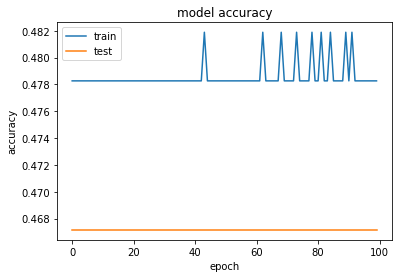

In [28]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

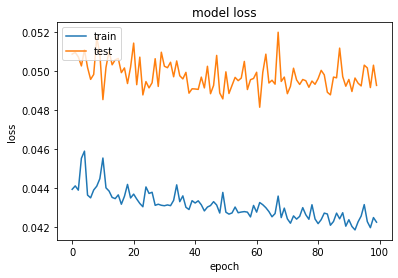

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()